In [ ]:
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random

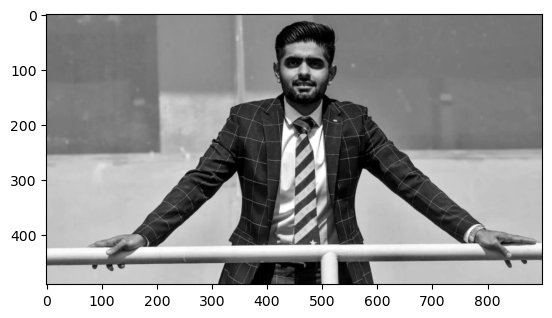

In [ ]:
img = cv2.imread('rgb.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap = 'gray')

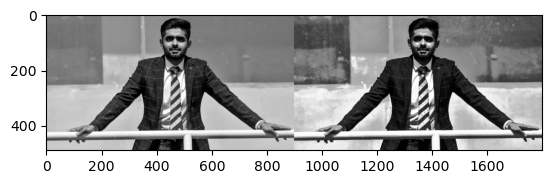

In [ ]:
# Histogram Equalization (Redistributing Pixels)
equ = cv2.equalizeHist(img)
res = np.hstack((img, equ))
plt.imshow(res, cmap='gray')
plt.show()

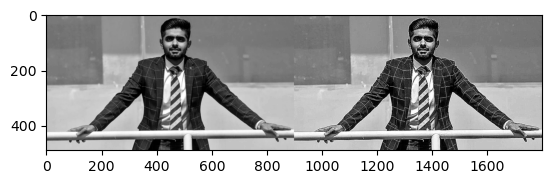

In [ ]:
# Sharpening (Enhance Edges & Details)
kernel = np.array([[-1, -1, -1],
                   [-1, 9, -1],
                   [-1, -1, -1]])

sharpened_image = cv2.filter2D(img, -1, kernel)
res = np.hstack((img, sharpened_image))
plt.imshow(res, cmap='gray')

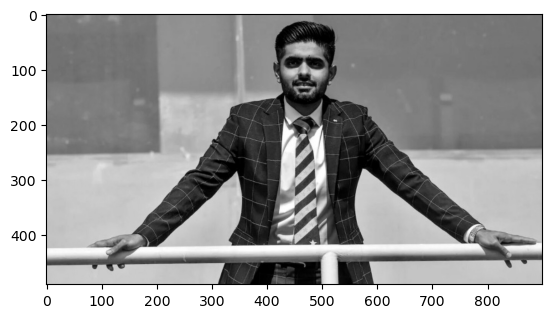

In [ ]:
# Convert the image from BGR to RGB format (if needed)
corrected_image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using plt.imshow()
plt.imshow(corrected_image_rgb)

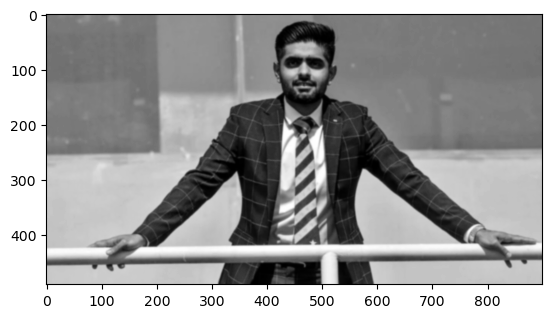

In [ ]:
# Noise Reduction (Remove Noise)

denoised_image = cv2.GaussianBlur(img, (5, 5), 0)
plt.imshow(denoised_image, cmap = 'gray')

# 1.2

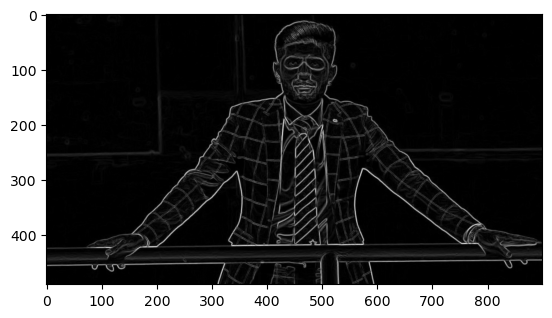

In [ ]:
# Gradient Filtering using Sobel Operator
gradient_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Calculate magnitude and normalize
magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
magnitude = np.uint8(255 * magnitude / np.max(magnitude))

cv2.imwrite('gradient_image.jpg', magnitude)

plt.imshow(magnitude, cmap = 'gray')

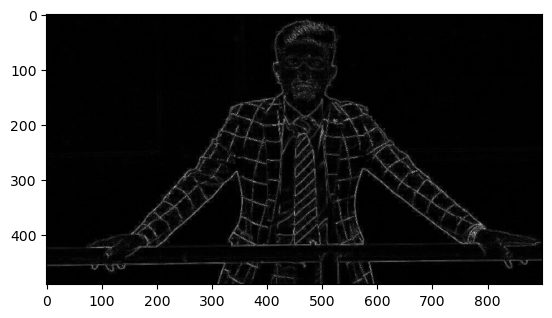

In [ ]:
# Calculate Laplacian of the image
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# Take the absolute value of Laplacian (to ensure edges are positive)
laplacian = np.uint8(np.abs(laplacian))

cv2.imwrite('laplacian_edge_image.jpg', laplacian)

plt.imshow(laplacian, cmap = 'gray')

# 1.3

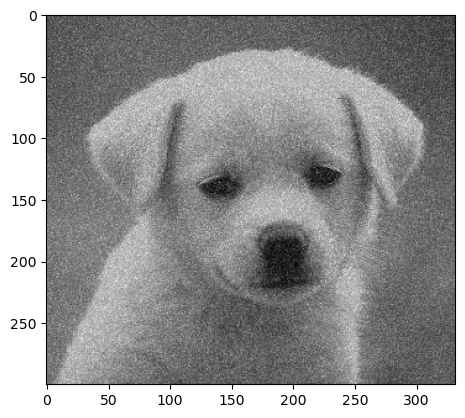

In [ ]:
# Load noisy image
noisy_image = cv2.imread('rgb.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(noisy_image, cmap = 'gray')



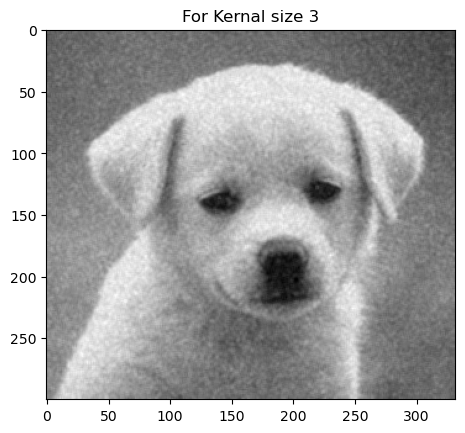

In [ ]:
# apply arithmetic mean for kernal size = 3 & 5
kernal_size = (3,3)
filtered_image = cv2.blur(noisy_image, kernal_size)
plt.title("For Kernal size 3")
plt.imshow(filtered_image, cmap = 'gray')

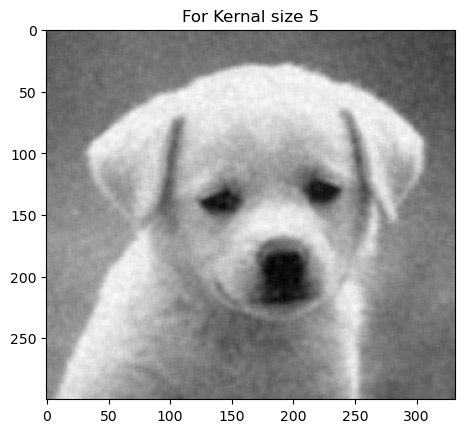

In [ ]:
kernal_size1 = (5,5)
filtered_image1 = cv2.blur(noisy_image, kernal_size1)
plt.title("For Kernal size 5")
plt.imshow(filtered_image1, cmap = 'gray')

# 1.4

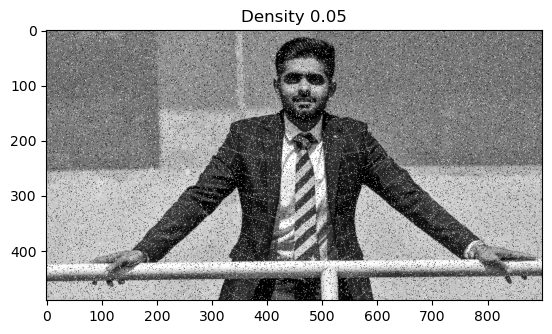

In [ ]:
# Salt and Pepper

def add_salt_and_pepper_noise(image, density):
    noisy_image = np.copy(image)
    num_pixels = noisy_image.size

    num_salt = int(num_pixels * density)

    # Generate random coordinates for salt noise within the image dimensions
    salt_coords_x = np.random.randint(0, image.shape[1], num_salt)
    salt_coords_y = np.random.randint(0, image.shape[0], num_salt)

    noisy_image[salt_coords_y, salt_coords_x] = 255  # Set salt noise to maximum pixel value (white)

    num_pepper = int(num_pixels * density)

    # Generate random coordinates for pepper noise within the image dimensions
    pepper_coords_x = np.random.randint(0, image.shape[1], num_pepper)
    pepper_coords_y = np.random.randint(0, image.shape[0], num_pepper)

    noisy_image[pepper_coords_y, pepper_coords_x] = 0  # Set pepper noise to minimum pixel value (black)

    return noisy_image

# Add noise with density 0.05
noised_image_005 = add_salt_and_pepper_noise(img, density=0.05)

# Add noise with density 0.07
noised_image_007 = add_salt_and_pepper_noise(img, density=0.07)

plt.title("Density 0.05")
plt.imshow(noised_image_005, cmap = 'gray')

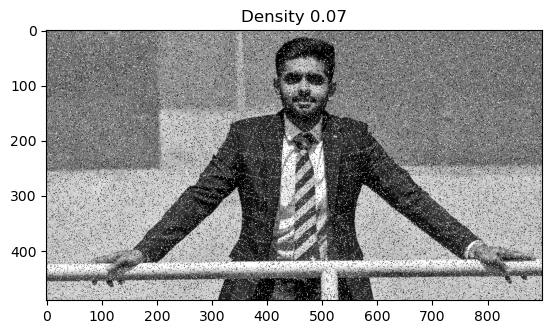

In [ ]:
plt.title("Density 0.07")
plt.imshow(noised_image_007, cmap = 'gray')

# 1.5

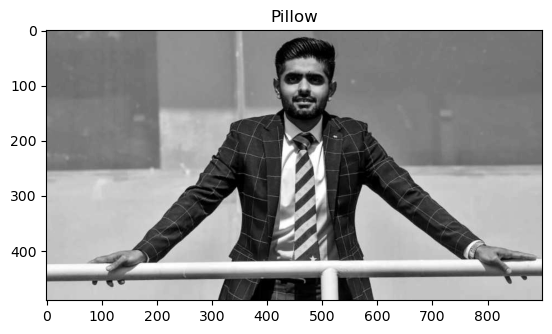

In [ ]:
# Compressing using Pillow

from PIL import Image

# Open the grayscale clean image using Pillow
clean_image = Image.open('rgb.jpg')
grayscale_image = clean_image.convert('L')

# Define the compression quality (0-100, higher is better quality)
compression_quality = 50

# Save the compressed grayscale image
grayscale_image.save('compressed_pillow_grayscale.jpg', quality=compression_quality)

compressed_image = Image.open('compressed_pillow_grayscale.jpg')

plt.title("Pillow")
plt.imshow(compressed_image, cmap='gray')


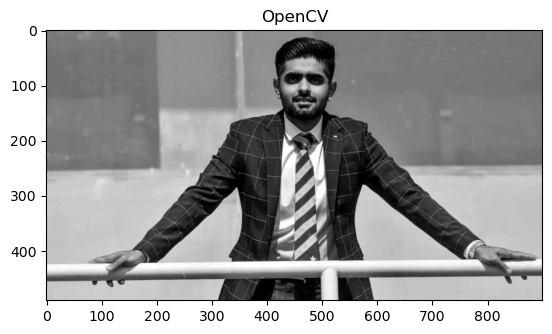

In [ ]:
# Compressing using OpenCV
compression_format = cv2.IMWRITE_JPEG_QUALITY
compression_quality = 50

# Save the compressed grayscale image using OpenCV
cv2.imwrite('compressed_opencv_grayscale.jpg', img, [compression_format, compression_quality])

# Load the compressed grayscale image
compressed_image = cv2.imread('compressed_opencv_grayscale.jpg', cv2.IMREAD_GRAYSCALE)

plt.title("OpenCV")
plt.imshow(compressed_image, cmap='gray')

# 1.6

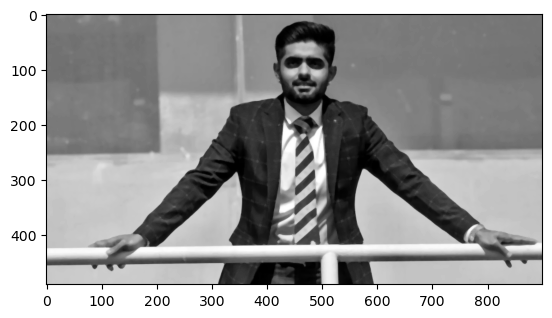

In [ ]:
# Perform Image Filtering by these techniques

# Gaussain Blurring Filtering on kernel_size of (5, 5)

gaussian_blurred_image = cv2.GaussianBlur(img, (5, 5), 0)
plt.imshow(gaussian_blur, cmap = 'gray')


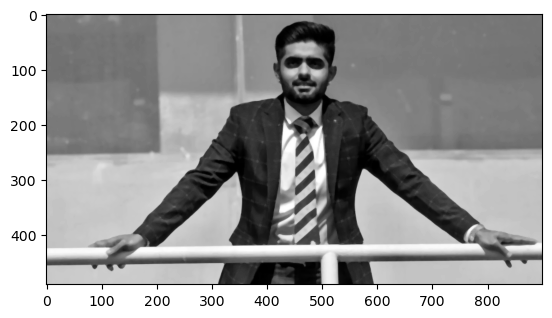

In [ ]:
# Median Filter for kernel size of 5

gaussian_blur = cv2.medianBlur(img, 5)
plt.imshow(gaussian_blur, cmap = 'gray')


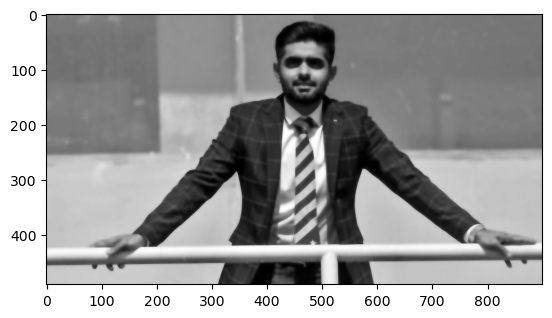

In [ ]:
#  Bilateral Filter for diameter = 9, color = 75, space = 75

bilateral_filtered_image = cv2.bilateralFilter(img, 9, 75, 75)
plt.imshow(bilateral_filtered_image, cmap = 'gray')